[1]  모듈 로딩
***

In [1]:
# 1-1. 필요 모듈 로딩

import pandas as pd                 # 데이터 프레임을 다루기 위한 모듈
import numpy as np                  # NAN값을 입력하기 위한 모듈
import openpyxl                     # 엑셀 데이터를 불러 오기 위한 모듈
from bs4 import BeautifulSoup       # 영화 제목 별 평점을 모으기 위한 모듈
import requests                     # 
import os                           # 폴더 내 파일들을 일괄적으로 불러오기 위한 모듈
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from datetime import datetime
import utill


In [2]:
# 1-2 파일 로딩
 
Open_Movie = [ ]
DIR_PATH = r'C:\Users\kdp\OneDrive\바탕 화면\3.시각화프로젝트\영화관_입장권_통합전산망'

if os.path.exists(DIR_PATH):                 # 패스의 경로가 있는지 확인 하기
    print(os.listdir(DIR_PATH))              # 폴더 내에 있는 파일의의 리스트를 줌
    datafiles = os.listdir(DIR_PATH)         # datafile에 파일의 리스트를 저장
    for filename in datafiles:               # 파일 리스트를 하나씩 불러오기
        xlsxFile = DIR_PATH + '\\' + filename   # 폴더 명과 파일 리스트의 이름을 합쳐서 파일을 불러올 절대 경로 생성
        print(DIR_PATH + '\\' + filename)    # 생성된 파일 확인 
        Open_Movie.append(xlsxFile)          # 빈 리스트에 파일명 추가하기 

all_DF = pd.read_excel(Open_Movie[0])       # DF를 병합 할 것이기 때문에 -> 기준이 되는 DF를 만들어 놓음

for i in Open_Movie[1:]:                # Open_Movie에 있는 파일들을 하나씩 불러옴
    all_DF = pd.concat([all_DF,pd.read_excel(i)], axis = 0)     # 불러온 파일들을 하나씩 불러 들어와 기준이 되는 all_DF에 병합


['개봉영화_2004.xlsx', '개봉영화_2005.xlsx', '개봉영화_2006.xlsx', '개봉영화_2007.xlsx', '개봉영화_2008.xlsx', '개봉영화_2009.xlsx', '개봉영화_2010.xlsx', '개봉영화_2011.xlsx', '개봉영화_2012.xlsx', '개봉영화_2013.xlsx', '개봉영화_2014.xlsx', '개봉영화_2015.xlsx', '개봉영화_2016.xlsx', '개봉영화_2017.xlsx', '개봉영화_2018.xlsx', '개봉영화_2019.xlsx', '개봉영화_2020.xlsx', '개봉영화_2021.xlsx', '개봉영화_2022.xlsx', '개봉영화_2023.xlsx', '개봉영화_2024.xlsx']
C:\Users\kdp\OneDrive\바탕 화면\3.시각화프로젝트\영화관_입장권_통합전산망\개봉영화_2004.xlsx
C:\Users\kdp\OneDrive\바탕 화면\3.시각화프로젝트\영화관_입장권_통합전산망\개봉영화_2005.xlsx
C:\Users\kdp\OneDrive\바탕 화면\3.시각화프로젝트\영화관_입장권_통합전산망\개봉영화_2006.xlsx
C:\Users\kdp\OneDrive\바탕 화면\3.시각화프로젝트\영화관_입장권_통합전산망\개봉영화_2007.xlsx
C:\Users\kdp\OneDrive\바탕 화면\3.시각화프로젝트\영화관_입장권_통합전산망\개봉영화_2008.xlsx
C:\Users\kdp\OneDrive\바탕 화면\3.시각화프로젝트\영화관_입장권_통합전산망\개봉영화_2009.xlsx
C:\Users\kdp\OneDrive\바탕 화면\3.시각화프로젝트\영화관_입장권_통합전산망\개봉영화_2010.xlsx
C:\Users\kdp\OneDrive\바탕 화면\3.시각화프로젝트\영화관_입장권_통합전산망\개봉영화_2011.xlsx
C:\Users\kdp\OneDrive\바탕 화면\3.시각화프로젝트\영화관_입장권_통합전산망\개봉영화_2012.xlsx
C:\Users\kdp\OneDr

In [3]:
# 1-3 DF 정보 확인

# all_DF.set_index('영화명',inplace=True) # 후일 평점이나 다른 데이터를 불러오기 위한 '영화명'을 인덱스로 설정

print(all_DF.info()) # all_DF 정보 확인
print(all_DF.shape) # (20528, 10)
all_DF.head()

<class 'pandas.core.frame.DataFrame'>
Index: 20528 entries, 0 to 1612
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순위       20528 non-null  object        
 1   영화명      20503 non-null  object        
 2   개봉일      13137 non-null  datetime64[ns]
 3   매출액      20528 non-null  int64         
 4   매출액 점유율  20507 non-null  float64       
 5   관객수      20528 non-null  int64         
 6   스크린수     20528 non-null  int64         
 7   상영횟수     20528 non-null  int64         
 8   대표국적     20507 non-null  object        
 9   국적       20507 non-null  object        
 10  배급사      12573 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 1.9+ MB
None
(20528, 11)


,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
0,1,태극기 휘날리며,2004-02-05,15687180500,0.066,2544911,115,22375,한국,한국,"(주)제이앤씨미디어그룹,와이드 릴리즈(주),(주)다자인소프트,(주)쇼박스"
1,2,내 머리 속의 지우개,2004-11-05,11918750500,0.050,1885637,206,29526,한국,한국,씨제이엔터테인먼트
2,3,귀신이 산다,2004-09-17,11900144500,0.050,1876157,174,27890,한국,한국,(주)시네마서비스
3,4,우리 형,2004-10-08,11088276500,0.046,1778224,209,29239,한국,한국,씨제이엔터테인먼트
4,5,실미도,2003-12-24,9905232500,0.041,1559134,51,13460,한국,한국,(주)시네마서비스


In [4]:
# 각 컬럼의 결측치 및 고유값 확인
all_isna_DF = {}
all_unique_DF = {}

for i in all_DF.columns:
    all_isna_DF[i] = all_DF[i].isna().sum()
    all_unique_DF[i] = all_DF[i].unique()

all_isna_DF   
# all_unique_DF

# 칼럼별 결측치 
# {'순위': 0, '영화명': 25,  '개봉일': 7391, '매출액': 0,  '매출액 점유율': 21, '관객수': 0, 
#  '스크린수': 0, '상영횟수': 0, '대표국적': 21, '국적': 21,'배급사': 7955}


# 순위 : 해당 분석에서 순위의 요소는 중요하지 않음 => 순위 칼럼 삭제
# *영화명 : 영화명이 없다면 평점을 확인 할 수 없으므로 행 삭제 => 영화명 칼럼이 nan 일 경우 행 전체 삭제 
# 개봉일 : 영화가 실제로 영화관에 정식으로 상영한 날짜짜
# *매출액 : 영화가 개봉하여서 
# 매출액 점유율 : 연도별의 매출액 점유율 => 필요없는 칼럼이므로 삭제
# *관객수 : 
# *스크린 수 : 
# *상영횟수 : 
# 대표국적 : '한국'영화를 중심으로 조사를 하였기에 국적을 알 수 없을 시 삭제 / 
# *국적 : 칼럼 특성 상 여러 나라가 참여 했을 수 있으나 다른 국적들도 있었기에 칼럼 자체 삭제
# 배급사 : 

{'순위': 0,
 '영화명': 25,
 '개봉일': 7391,
 '매출액': 0,
 '매출액 점유율': 21,
 '관객수': 0,
 '스크린수': 0,
 '상영횟수': 0,
 '대표국적': 21,
 '국적': 21,
 '배급사': 7955}

In [ ]:
# 현재 분석에 필요없는 칼럼 삭제
all_DF.drop(['순위', '매출액 점유율', '국적','배급사'], axis=1, inplace=True)
all_DF.info()
all_DF

<class 'pandas.core.frame.DataFrame'>
Index: 20528 entries, 0 to 1612
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     20503 non-null  object        
 1   개봉일     13137 non-null  datetime64[ns]
 2   매출액     20528 non-null  int64         
 3   관객수     20528 non-null  int64         
 4   스크린수    20528 non-null  int64         
 5   상영횟수    20528 non-null  int64         
 6   대표국적    20507 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.3+ MB


,영화명,개봉일,매출액,관객수,스크린수,상영횟수,대표국적
0,태극기 휘날리며,2004-02-05,15687180500,2544911,115,22375,한국
1,내 머리 속의 지우개,2004-11-05,11918750500,1885637,206,29526,한국
2,귀신이 산다,2004-09-17,11900144500,1876157,174,27890,한국
3,우리 형,2004-10-08,11088276500,1778224,209,29239,한국
4,실미도,2003-12-24,9905232500,1559134,51,13460,한국
...,...,...,...,...,...,...,...
1608,필름다빈X아리랑인디웨이브 섹션1,NaT,0,0,1,1,한국
1609,필름다빈X아리랑인디웨이브 섹션 2,NaT,0,0,1,1,한국
1610,필름다빈X아리랑인디웨이브 섹션 3,NaT,0,0,1,1,한국
1611,제25회 대구단편영화제 배리어프리 특별전: 장벽을 허물고 1,NaT,0,0,1,1,한국


In [ ]:
# 1) 영화명이 없이는 평점을 찾을 수 없음 => 결측치 행 전체 삭제 


all_DF.dropna(subset=['영화명','대표국적'], inplace=True)
all_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20503 entries, 0 to 1611
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     20503 non-null  object        
 1   개봉일     13137 non-null  datetime64[ns]
 2   매출액     20503 non-null  int64         
 3   관객수     20503 non-null  int64         
 4   스크린수    20503 non-null  int64         
 5   상영횟수    20503 non-null  int64         
 6   대표국적    20503 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.3+ MB


In [7]:
# 2) 한국 영화를 기준으로 분석을 하는 것이므로 국적 미상의 영화는 분석 불가 => 삭제

all_DF['대표국적'].unique() # array(['한국'], dtype=object)

# 대표국적 고유값이 '한국' 이므로 원하는 데이터를 적절히 추출함 
# '대표국적' 칼럼 삭제
all_DF.drop('대표국적', axis= 1, inplace=True)
all_DF

,영화명,개봉일,매출액,관객수,스크린수,상영횟수
0,태극기 휘날리며,2004-02-05,15687180500,2544911,115,22375
1,내 머리 속의 지우개,2004-11-05,11918750500,1885637,206,29526
2,귀신이 산다,2004-09-17,11900144500,1876157,174,27890
3,우리 형,2004-10-08,11088276500,1778224,209,29239
4,실미도,2003-12-24,9905232500,1559134,51,13460
...,...,...,...,...,...,...
1607,"아리랑시네센터X이경미, 잘돼가?무엇이든",NaT,0,0,1,1
1608,필름다빈X아리랑인디웨이브 섹션1,NaT,0,0,1,1
1609,필름다빈X아리랑인디웨이브 섹션 2,NaT,0,0,1,1
1610,필름다빈X아리랑인디웨이브 섹션 3,NaT,0,0,1,1


In [8]:
len(all_DF['상영횟수'].unique())
(all_DF['상영횟수'] == 1).value_counts()    

# 상영횟수가 1인 인덱스의 갯수가 너무 많아 삭제 => False 5666
# => 특별상영(사인회, 선공개 등)을 제외한 정규적으로 극장에서 개봉한 영화를 추리기 위함

all_DF = all_DF[all_DF['스크린수'] != 1]
all_DF.head()

,영화명,개봉일,매출액,관객수,스크린수,상영횟수
0,태극기 휘날리며,2004-02-05,15687180500,2544911,115,22375
1,내 머리 속의 지우개,2004-11-05,11918750500,1885637,206,29526
2,귀신이 산다,2004-09-17,11900144500,1876157,174,27890
3,우리 형,2004-10-08,11088276500,1778224,209,29239
4,실미도,2003-12-24,9905232500,1559134,51,13460


In [9]:
# 매출액이  1억원 이하 삭제
all_DF = all_DF[all_DF['매출액'] >= 100000000]
all_DF

,영화명,개봉일,매출액,관객수,스크린수,상영횟수
0,태극기 휘날리며,2004-02-05,15687180500,2544911,115,22375
1,내 머리 속의 지우개,2004-11-05,11918750500,1885637,206,29526
2,귀신이 산다,2004-09-17,11900144500,1876157,174,27890
3,우리 형,2004-10-08,11088276500,1778224,209,29239
4,실미도,2003-12-24,9905232500,1559134,51,13460
...,...,...,...,...,...,...
131,에픽하이 20 더 무비,2024-03-20,139627500,6620,54,725
135,실리카겔,2024-08-21,136574000,6208,29,272
136,쏜애플 불구경 2024 라이브 콘서트 필름,2024-10-30,136419000,6201,18,308
138,정국: 아이 엠 스틸 위드 유,2024-10-09,146215000,5849,41,473


In [10]:
# 영화명을 기준을 인덱스 고정

all_DF['영화명'] = all_DF['영화명'].str.replace(" ","",regex=False)
all_DF.set_index('영화명', inplace=True)
all_DF


,개봉일,매출액,관객수,스크린수,상영횟수
영화명,,,,,
태극기휘날리며,2004-02-05,15687180500,2544911,115,22375
내머리속의지우개,2004-11-05,11918750500,1885637,206,29526
귀신이산다,2004-09-17,11900144500,1876157,174,27890
우리형,2004-10-08,11088276500,1778224,209,29239
실미도,2003-12-24,9905232500,1559134,51,13460
...,...,...,...,...,...
에픽하이20더무비,2024-03-20,139627500,6620,54,725
실리카겔,2024-08-21,136574000,6208,29,272
쏜애플불구경2024라이브콘서트필름,2024-10-30,136419000,6201,18,308


In [ ]:
# 영화 평점 수집집

movies=all_DF.index

movie_ratings = {}


headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}



for movie in movies[1600:]:
    # 검색 URL => 네이버
    url = f"https://search.naver.com/search.naver?query={movie}영화"

    try:

    # 웹 페이지 요청
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # 평점 추출 
        rating = soup.find('span', class_="area_star_number")  
        
        if rating:
            movie_ratings[movie] = rating.text
        else:
            movie_ratings[movie] = np.nan

    except Exception as e:
        movie_ratings[movie] = np.nan
        print(f"Error fetching rating for {movie}: {e}")   
time.sleep(1)

# 결과 출력
for movie, rating in movie_ratings.items():
    print(f"{movie}: {rating}")
movie_ratings


In [11]:
# 평점 데이터 불러오기 
rat_DF = pd.read_excel(r'C:\Users\kdp\OneDrive\바탕 화면\3.시각화프로젝트\Rating.xlsx', header= None)
rat_DF = rat_DF.rename(columns={0:'영화명',1:'평점'})
rat_DF['영화명'] = rat_DF['영화명'].str.replace("'", '', regex=False)  # regex=False로 지정
rat_DF['영화명'] = rat_DF['영화명'].str.replace(" ", '', regex=False)
rat_DF['평점'] = rat_DF['평점'].str.replace("'", '', regex=False)
rat_DF['평점'] = rat_DF['평점'].str.replace(" ", '', regex=False)
rat_DF['평점'] = rat_DF['평점'].str.replace(",", '', regex=False)
# rat_DF['영화명'].replace("'",'',inplace=True)
rat_DF.set_index('영화명',inplace=True)
rat_DF


,평점
영화명,
태극기휘날리며,nan
내머리속의지우개,9.0910
귀신이산다,7.0110
우리형,8.4010
실미도,8.3910
...,...
에픽하이20더무비,8.8310
실리카겔,8.4010
쏜애플불구경2024라이브콘서트필름,10.0010


In [12]:
maaster_df = all_DF.join(rat_DF, how='left')  # inner join으로 공통 인덱스만 합침
maaster_df

,개봉일,매출액,관객수,스크린수,상영횟수,평점
영화명,,,,,,
태극기휘날리며,2004-02-05,15687180500,2544911,115,22375,nan
태극기휘날리며,2004-02-05,15687180500,2544911,115,22375,8.9410
내머리속의지우개,2004-11-05,11918750500,1885637,206,29526,9.0910
귀신이산다,2004-09-17,11900144500,1876157,174,27890,7.0110
우리형,2004-10-08,11088276500,1778224,209,29239,8.4010
...,...,...,...,...,...,...
에픽하이20더무비,2024-03-20,139627500,6620,54,725,8.8310
실리카겔,2024-08-21,136574000,6208,29,272,8.4010
쏜애플불구경2024라이브콘서트필름,2024-10-30,136419000,6201,18,308,10.0010


In [13]:
# 계산을 위하여 평점을 실수로 변환환
maaster_df = maaster_df[~((maaster_df.index.duplicated(keep=False)) & (maaster_df['평점'] == 'nan'))]
maaster_df

maaster_df['평점'].astype('float64')

영화명
태극기휘날리며                8.941
내머리속의지우개               9.091
귀신이산다                  7.011
우리형                    8.401
실미도                    8.391
                       ...  
에픽하이20더무비              8.831
실리카겔                   8.401
쏜애플불구경2024라이브콘서트필름    10.001
정국:아이엠스틸위드유            8.301
링팝:더브이알콘서트카이          10.001
Name: 평점, Length: 1693, dtype: float64

In [14]:
# 평점으 결측치 제거
maaster_df = maaster_df[maaster_df['평점'] != 'nan']
maaster_df

,개봉일,매출액,관객수,스크린수,상영횟수,평점
영화명,,,,,,
태극기휘날리며,2004-02-05,15687180500,2544911,115,22375,8.9410
내머리속의지우개,2004-11-05,11918750500,1885637,206,29526,9.0910
귀신이산다,2004-09-17,11900144500,1876157,174,27890,7.0110
우리형,2004-10-08,11088276500,1778224,209,29239,8.4010
실미도,2003-12-24,9905232500,1559134,51,13460,8.3910
...,...,...,...,...,...,...
에픽하이20더무비,2024-03-20,139627500,6620,54,725,8.8310
실리카겔,2024-08-21,136574000,6208,29,272,8.4010
쏜애플불구경2024라이브콘서트필름,2024-10-30,136419000,6201,18,308,10.0010


[3] 시각화 시작!!
***

In [18]:
maaster_df.corr()

,개봉일,매출액,관객수,스크린수,상영횟수,평점
개봉일,1.000000,0.033148,0.013827,0.175507,0.072358,0.056752
매출액,0.033148,1.000000,0.989947,0.674401,0.907860,0.116115
관객수,0.013827,0.989947,1.000000,0.624175,0.874051,0.111889
스크린수,0.175507,0.674401,0.624175,1.000000,0.822670,0.047901
상영횟수,0.072358,0.907860,0.874051,0.822670,1.000000,0.082408
평점,0.056752,0.116115,0.111889,0.047901,0.082408,1.000000


In [19]:
F_File = r'C:\Users\kdp\OneDrive\바탕 화면\KDT_7\03.VISIUAL\D0127\GULIM.TTC'
utill.setHangulFont(F_File)

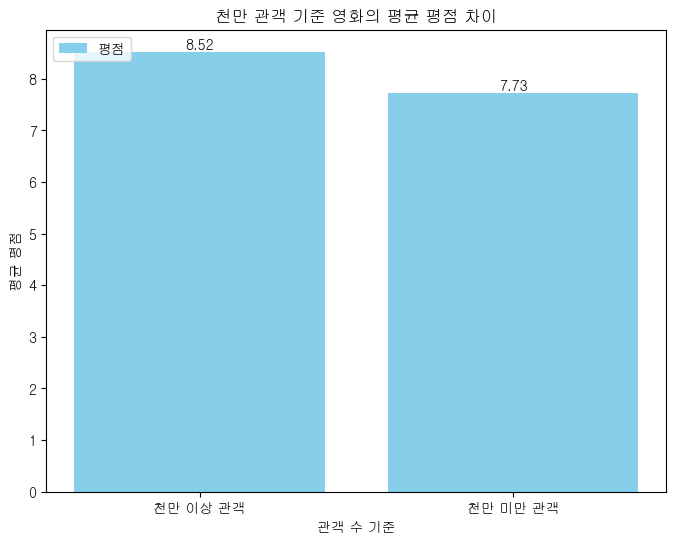

In [40]:
# 관객수 그룹화  ==> 천만명 이상
(maaster_df['관객수'] >= 10000000).sum()       # 8


H_Up = maaster_df[(maaster_df['관객수'] >= 10000000)]
H_down = maaster_df[(maaster_df['관객수'] < 10000000)]

H_Up.corr().iloc[-1]
H_down.corr().iloc[-1]

H_Up['평점'].mean()
H_down['평점'].mean()

H_Up['매출액'].mean()
H_down['매출액'].mean()


# 그래프 그리기 ---------------------------------------------------------------------------------------------------------

mean_rating = [H_Up['평점'].mean(), H_down['평점'].mean()]          # 평균 평점
labels = ['천만 이상 관객', '천만 미만 관객']   # X축 라벨 설정
x = np.arange(len(labels))  # x 위치 설정


fig, ax1 = plt.subplots(figsize=(8, 6))


# bar_width = 0.35                                                                            # bar 너비 설정

bars1 = ax1.bar(labels, mean_rating, label='평점', color='skyblue')  

# 그래프 꾸미기
ax1.set_xlabel('관객 수 기준')
ax1.set_ylabel('평균 평점')
ax1.set_title("천만 관객 기준 영화의 평균 평점 차이")

ax1.set_xticks(x)
ax1.set_xticklabels(labels)

# 범례 추가
ax1.legend(loc='upper left')

for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# 그래프 표시
plt.show()

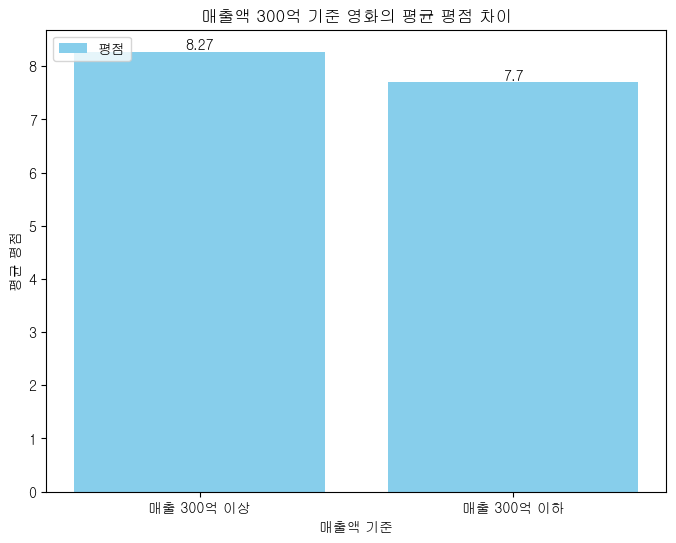

In [39]:
# 매출액 그룹화  ==> 300억원 이상
(maaster_df['매출액'] >= 30000000000).sum() # 105

M_up = maaster_df[(maaster_df['매출액'] >= 30000000000)]
M_down = maaster_df[(maaster_df['매출액'] < 30000000000)]

M_up.iloc[-1]
M_down .iloc[-1]

M_up['평점'].mean()
M_down['평점'].mean()


# 그래프 그리기 ---------------------------------------------------------------------------------------------------------
mean_rating = [M_up['평점'].mean(), M_down['평점'].mean()]          # 평균 평점



labels = ['매출 300억 이상', '매출 300억 이하']   # X축 라벨 설정
x = np.arange(len(labels))  # x 위치 설정


fig, ax1 = plt.subplots(figsize=(8, 6))


bar_width = 0.35                                                                            # bar 너비 설정
bars1 = ax1.bar(labels, mean_rating, label='평점', color='skyblue')     # 좌측 y를 사용하는 bar 설정

# 그래프 꾸미기
ax1.set_xlabel('매출액 기준')
ax1.set_ylabel('평균 평점')
ax1.set_title("매출액 300억 기준 영화의 평균 평점 차이")

ax1.set_xticks(x)
ax1.set_xticklabels(labels)

# 범례 추가
ax1.legend(loc='upper left')

for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
# 그래프 표시
plt.show()


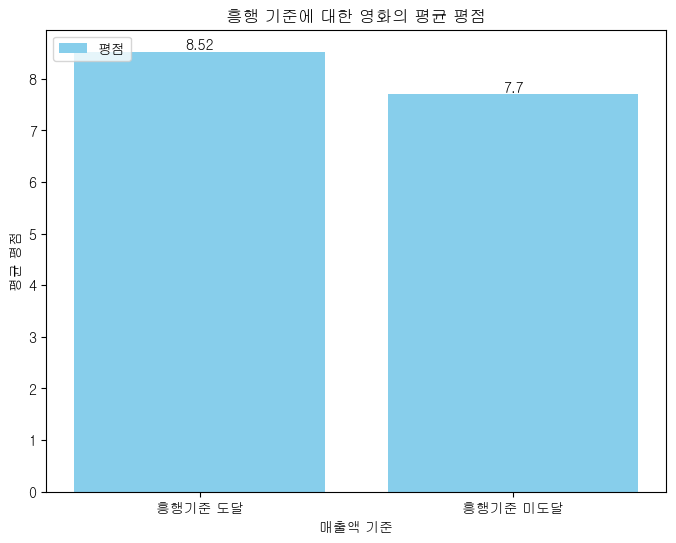

In [38]:
# 관객수와 매출액 그룹화 ==> 천만원 이상, 300억원 이상

#  흥행영화
((maaster_df['관객수'] >= 10000000) & (maaster_df['매출액'] >=30000000000)).sum() # 18

I_up = maaster_df[((maaster_df['관객수'] >= 10000000) & (maaster_df['매출액'] >= 30000000000))]
I_down = maaster_df[((maaster_df['관객수'] < 10000000) & (maaster_df['매출액'] < 30000000000))]

I_up.corr().iloc[-1]
I_down.corr().iloc[-1]

I_up['평점'].mean()
I_down['평점'].mean()

# 그래프 그리기 ---------------------------------------------------------------------------------------------------------
mean_rating = [I_up['평점'].mean(), I_down['평점'].mean()]          # 평균 평점



labels = ['흥행기준 도달', '흥행기준 미도달']   # X축 라벨 설정
x = np.arange(len(labels))  # x 위치 설정


fig, ax1 = plt.subplots(figsize=(8, 6))


bar_width = 0.25                                                                            # bar 너비 설정
bars1 = ax1.bar(labels, mean_rating, label='평점', color='skyblue')     # 좌측 y를 사용하는 bar 설정

# 그래프 꾸미기
ax1.set_xlabel('매출액 기준')
ax1.set_ylabel('평균 평점')
ax1.set_title("흥행 기준에 대한 영화의 평균 평점")

ax1.set_xticks(x)
ax1.set_xticklabels(labels)

# 범례 추가
ax1.legend(loc='upper left')

for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# 그래프 표시
plt.show()

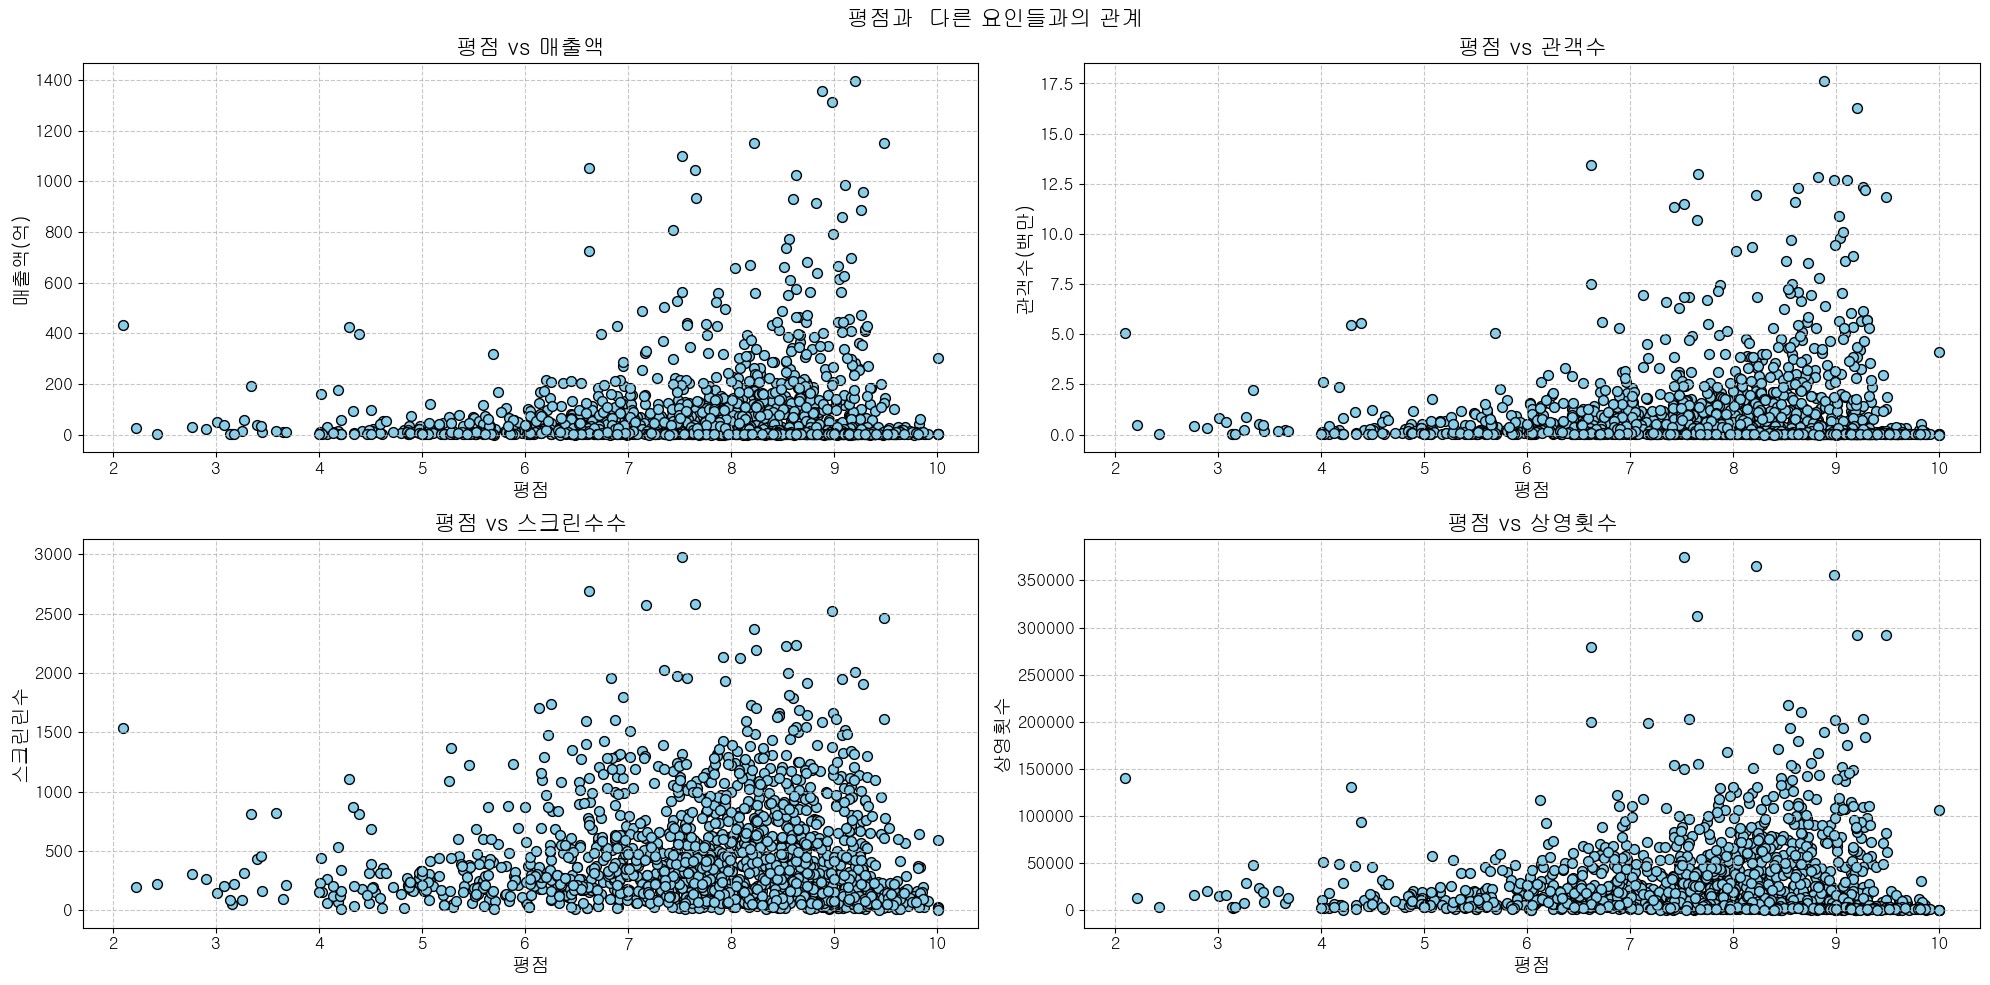

In [ ]:
nrows = 2 
ncols = 2

plt.figure(figsize=(20,10)) 

plt.suptitle('평점과  다른 요인들과의 관계', fontdict={'fontweight': 'bold'}, fontsize = 16)

plt.subplot(nrows, ncols, 1)                                  # 그래프 크기 설정
plt.scatter(maaster_df['평점'], maaster_df['매출액'] / 100000000, color='skyblue', edgecolor='black', s=50)  # 산점도
plt.title(f'평점 vs 매출액', fontsize=16)                                                    # 제목 설정
plt.xlabel('평점', fontsize=14)                                 # x축 레이블
plt.ylabel('매출액(억)', fontsize=14)                                    # y축 레이블
plt.grid(True, linestyle='--', alpha=0.7)                       # 그리드 추가
plt.xticks(fontsize=12)                                         # x축 눈금 레이블 크기
plt.yticks(fontsize=12)                                         # y축 눈금 레이블 크기


plt.subplot(nrows, ncols, 2)
plt.scatter(maaster_df['평점'], maaster_df['관객수'] / 1000000, color='skyblue', edgecolor='black', s=50)  # 산점도
plt.title(f'평점 vs 관객수', fontsize=16)                                                    # 제목 설정
plt.xlabel('평점', fontsize=14)                                 # x축 레이블
plt.ylabel('관객수(백만)', fontsize=14)                                    # y축 레이블
plt.grid(True, linestyle='--', alpha=0.7)                       # 그리드 추가
plt.xticks(fontsize=12)                                         # x축 눈금 레이블 크기
plt.yticks(fontsize=12)                                         # y축 눈금 레이블 크기


plt.subplot(nrows, ncols, 3)
plt.scatter(maaster_df['평점'], maaster_df['스크린수'], color='skyblue', edgecolor='black', s=50)  # 산점도
plt.title(f'평점 vs 스크린수', fontsize=16)                                                    # 제목 설정
plt.xlabel('평점', fontsize=14)                                 # x축 레이블
plt.ylabel('스크린수', fontsize=14)                                    # y축 레이블
plt.grid(True, linestyle='--', alpha=0.7)                       # 그리드 추가
plt.xticks(fontsize=12)                                         # x축 눈금 레이블 크기
plt.yticks(fontsize=12)                                         # y축 눈금 레이블 크기


plt.subplot(nrows, ncols, 4)
plt.scatter(maaster_df['평점'], maaster_df['상영횟수'], color='skyblue', edgecolor='black', s=50)  # 산점도
plt.title(f'평점 vs 상영횟수', fontsize=16)                                                    # 제목 설정
plt.xlabel('평점', fontsize=14)                                 # x축 레이블
plt.ylabel('상영횟수', fontsize=14)                                    # y축 레이블
plt.grid(True, linestyle='--', alpha=0.7)                       # 그리드 추가
plt.xticks(fontsize=12)                                         # x축 눈금 레이블 크기
plt.yticks(fontsize=12)                                         # y축 눈금 레이블 크기



plt.tight_layout()
plt.show()




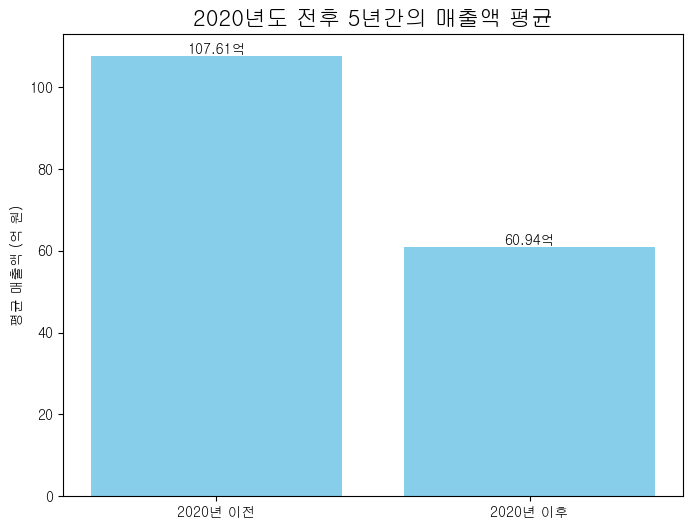

In [30]:
Ago_5Year = maaster_df[(maaster_df['개봉일'] >= datetime(2016, 2, 1)) & (maaster_df['개봉일'] <= datetime(2020, 2, 29))]
After_5Year = maaster_df[(maaster_df['개봉일'] >= datetime(2020, 2, 1)) & (maaster_df['개봉일'] <= datetime(2024, 2, 29))]

Ago_5Year.corr().iloc[-1]
After_5Year.corr().iloc[-1]



# 평균 매출액 계산
mean_sales = [np.mean(Ago_5Year['매출액']), np.mean(After_5Year['매출액'])]

# 억 단위로 변환
mean_sales_in_hundred_million = [sales / 100000000 for sales in mean_sales]

# 바 그래프 그리기
plt.figure(figsize=(8, 6))
bar_width = 0.4  # 바 너비 설정
bar_positions = np.arange(len(mean_sales)) * 0.5  # 바 위치 설정

bars = plt.bar(bar_positions, mean_sales_in_hundred_million, width=bar_width, color='skyblue')

# 그래프 꾸미기
plt.title('2020년도 전후 5년간의 매출액 평균', fontsize=16)
plt.xticks(bar_positions, ['2020년 이전', '2020년 이후'])  # X축 레이블 설정
plt.ylabel('평균 매출액 (억 원)')  # Y축 레이블 설정

# 바 위에 숫자 표시
for bar in bars:
    yval = bar.get_height()  # 바의 높이 (평균 매출액)
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}억', ha='center', va='bottom')

# 그래프 표시
plt.show()

{1: 0, 2: 5312570227, 3: 3393250541, 4: 7077017415, 5: 9882394580}


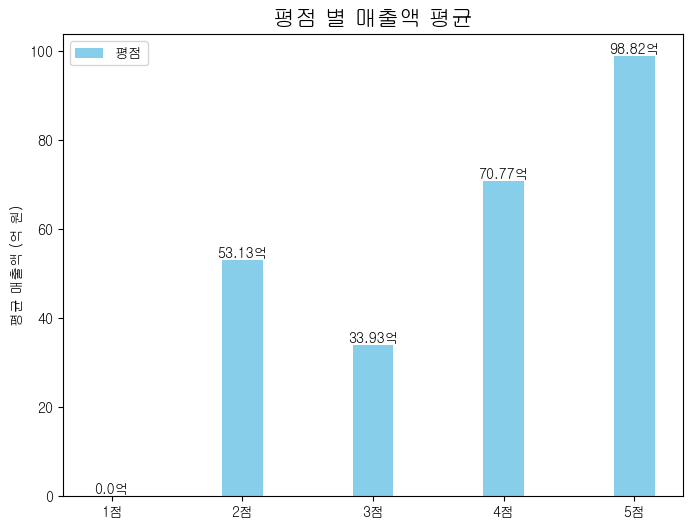

In [31]:
# 평점 대 별 매출액의 차이

rat_star ={ }

One_Star = maaster_df[(maaster_df['평점'] >= 0) & (maaster_df['평점'] < 2)]
Two_Star = maaster_df[(maaster_df['평점'] >= 2) & (maaster_df['평점'] < 4)]
Three_Star = maaster_df[(maaster_df['평점'] >= 4) & (maaster_df['평점'] < 6)]
Four_Star = maaster_df[(maaster_df['평점'] >= 6) & (maaster_df['평점'] < 8)]
Five_Star = maaster_df[(maaster_df['평점'] >= 8)]


for num, stars in enumerate([One_Star, Two_Star, Three_Star, Four_Star, Five_Star]):
    if pd.isna(stars['매출액'].mean()):
        rat_star[num+1] = 0
    else:
        rat_star[num+1] = round(stars['매출액'].mean())

print(rat_star)

# 평균 매출액 계산 (억 단위로 변환)
mean_sales_in_hundred_million = [sales / 100000000 for sales in list(rat_star.values())]

# 바 그래프 그리기
plt.figure(figsize=(8, 6))
bar_width = 0.25  # 바 너비 설정
bar_positions = np.arange(len(mean_sales_in_hundred_million)) * 0.8  # 바 위치 설정 (간격 줄이기)

bars = plt.bar(bar_positions, mean_sales_in_hundred_million, width=bar_width, color='skyblue', label='평점')

# 그래프 꾸미기
plt.title('평점 별 매출액 평균', fontsize=16)
plt.xticks(bar_positions, ['1점', '2점', '3점', '4점', '5점'])  # X축 레이블 설정
plt.ylabel('평균 매출액 (억 원)')  # Y축 레이블 설정

# 바 위에 숫자 표시
for bar in bars:
    yval = bar.get_height()  # 바의 높이 (평균 매출액)
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}억', ha='center', va='bottom')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
# 다양한 요소들과 평점간의 상관관계를 조사하였을 때 유의미하지 않은 수치가 나왔음
# 평점은 개개인의 주관으로 입력하는 것이며 객관적인 질문을 통한 응답이 아니기 떄문에 영화 흥행의 지표로 삼기에는 불가능하다다